<a href="https://colab.research.google.com/github/Vonnabe/Pokemon-speed-Stat-ML/blob/main/pokemonspeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the Dataset**

In [17]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d abcsds/pokemon
!unzip pokemon.zip

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 25.2MB/s]
Archive:  pokemon.zip
  inflating: Pokemon.csv             


In [18]:
import pandas as pd
original_df = pd.read_csv('Pokemon.csv')
original_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


**Select Features**

In [19]:
modified_df=original_df[['HP','Attack','Defense',
                         'Sp. Atk','Sp. Def','Speed']]

modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


**Split into 3 Partitions. Train, Val, Test**

In [20]:
shuffled_df = modified_df.sample(frac=1)
shuffled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
369,70,55,65,95,85,70
404,100,90,130,45,65,55
489,76,65,45,92,42,91
371,50,48,43,46,41,60
750,60,150,50,150,50,60


In [21]:
train_df=shuffled_df[:500]
val_df=shuffled_df[500:650]
test_df=shuffled_df[650:]

len(train_df), len(val_df), len(test_df)

(500, 150, 150)

In [22]:
X_train, y_train = train_df.to_numpy()[:, :-1],train_df.to_numpy()[:, -1]
X_val, y_val = val_df.to_numpy()[:, :-1],val_df.to_numpy()[:, -1]
X_test, y_test = test_df.to_numpy()[:, :-1],test_df.to_numpy()[:, -1]

(X_train.shape, y_train.shape),(X_val.shape, y_val.shape),(X_test.shape, y_test.shape)

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

**Preprocess the Inputs**

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

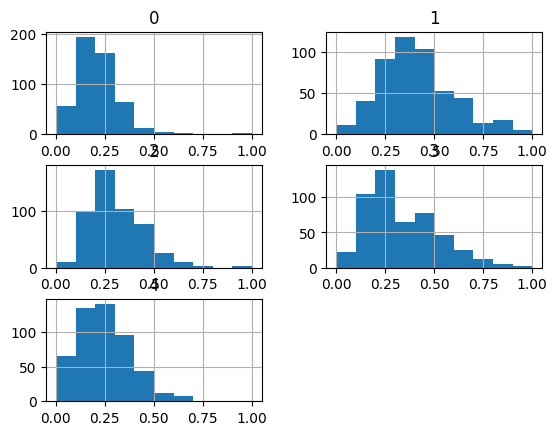

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler().fit(X_train)

X_train_scaled, X_val_scaled, X_test_scaled= scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

pd.DataFrame(X_train_scaled).hist()

**Pick Best Model**

In [24]:
from sklearn.metrics import mean_absolute_error

average_speed = y_train.mean()

mean_absolute_error(y_val, [average_speed]*len(y_val))

23.302613333333333

In [25]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

mean_absolute_error(y_val, linear_model.predict(X_val))

17.868031496011877

In [29]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(X_train, y_train)

mean_absolute_error(y_val, random_forest.predict(X_val))

17.669322222222224

In [43]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 2857.7295 - mean_absolute_error: 42.9718 - val_loss: 1713.8118 - val_mean_absolute_error: 31.8913
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 1623.8334 - mean_absolute_error: 30.9523 - val_loss: 1659.6693 - val_mean_absolute_error: 31.5879
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 1471.5189 - mean_absolute_error: 29.6886 - val_loss: 1504.2150 - val_mean_absolute_error: 29.9022
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 1361.1830 - mean_absolute_error: 28.6587 - val_loss: 1395.7745 - val_mean_absolute_error: 28.8054
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1257.8076 - mean_absolute_error: 27.6272 - val_loss: 1289.1232 - val_mean_absolute_error: 27.7872
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 1177.4572 - mean_absolute_error: 26.8387 - val_loss: 1200.0330 - val_me

In [45]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 3437.2651 - mean_absolute_error: 44.1500 - val_loss: 1134.3457 - val_mean_absolute_error: 26.8619
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 925.0624 - mean_absolute_error: 23.9173 - val_loss: 600.7668 - val_mean_absolute_error: 19.8680
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 688.8104 - mean_absolute_error: 20.8959 - val_loss: 557.5832 - val_mean_absolute_error: 19.1441
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 660.8106 - mean_absolute_error: 20.1649 - val_loss: 570.2744 - val_mean_absolute_error: 19.1784
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 665.0152 - mean_absolute_error: 20.3160 - val_loss: 576.0424 - val_mean_absolute_error: 19.0876
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 686.8609 - mean_absolute_error: 20.6503 - val_loss: 570.9478 - val_mean_absolut

In [48]:
model_2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                192       
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Evaluate The Chosen Model**

In [50]:
mean_absolute_error(y_test, linear_model.predict(X_test))

20.807579119125343